> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

## Dataset Description

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.
 



### Question(s) for Analysis
what is the distribution of the patients ages?

what factors affect showing up to the appointment?



In [2]:
# In this cell, we will import all the packages we are using in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01 1% |▋                               | 194kB 8.7MB/s eta 0:00:02    26% |████████▍                       | 2.7MB 27.8MB/s eta 0:00:01    78% |█████████████████████████       | 8.2MB 29.1MB/s eta 0:00:01    91% |█████████████████████████████▏  | 9.5MB 27.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01  2% |▊                               | 296kB 21.8MB/s eta 0:00:01    16% |█████▎                          | 2.2MB 23.1MB/s eta 0:00:01    35% |███████████▌                    | 4.8MB 26.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


In [5]:
# Loading the data and printing out a few lines to start inspecting the data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

Here we found that the column name of Hipertension and No-show need to adjusted

In [6]:
#first, lets show the shape of the data
df.shape

(110527, 14)

In [7]:
#check for duplicates
sum(df.duplicated())

0

In [8]:
#check if there is missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

Here we found that the age column has a min value of -1, which will be removed

In [8]:
#since we have an age row containing -1, we want to determine the row index to be removed
wrong_age = df.query('Age ==''-1')
wrong_age

ImportError: cannot import name 'is_url'

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


### Data Cleaning
we have no missing values,and no duplicated rows.

what need to be cleaned is the -1 value in the age column,
and change some column names (Hipertension to Hypertension and
No-show to No_show)

In [11]:
# removing the -1 value
df.drop(index=99832, inplace=True)

In [12]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   1.474934e+14   5.675304e+06      37.089219       0.098266   
std    2.560943e+14   7.129544e+04      23.110026       0.297676   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06      18.000000       0.000000   
50%    3.173184e+13   5.680572e+06      37.000000       0.000000   
75%    9.438963e+13   5.725523e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.197248       0.071865       0.030400       0.022248   
std         0.397923       0.258266       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [13]:
#correcting the columns names
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No_show  
0         0           0        0             0      No  
1         0           0        0      

<a id='eda'></a>
## Exploratory Data Analysis

here we will try to answer the questions we asked at the beggining of this report.


### Research Question 1 (what is the distribution of patientes age?)

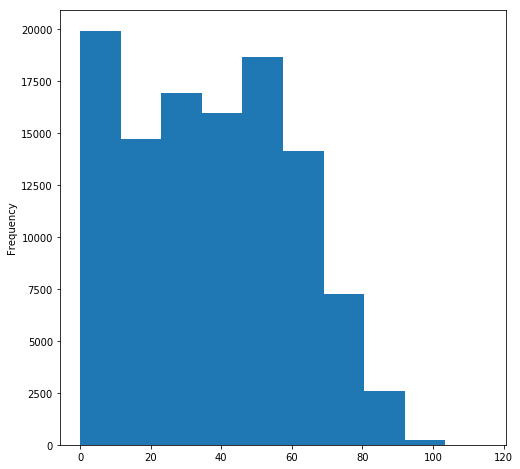

In [14]:
# inspecting the distribution of the age
df['Age'].plot(kind='hist',figsize=(8,8))

Here we can see the total number of patients for the same age, clearly children are the dominant here, followed by people with age around 50 o 60 years old

### Research Question 2  (What factors affect showing up to the appointment?)

### Is there a relation between reciving sms and showing to the appointmnet?

In [15]:
# we need to split the No_show values to two different dataframes accordiing to wether they showed or not
show=df.No_show=='No'
noshow=df.No_show=='Yes'

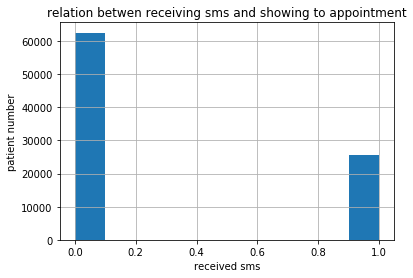

In [39]:
def showing(df,col_name,arrived,titles,x,y):
    df[col_name][arrived].hist()
    plt.legend();
    plt.title(titles)
    plt.xlabel(x)
    plt.ylabel(y)
    
showing(df,'SMS_received',show,'relation betwen receiving sms and showing to appointment','received sms','patient number' )

#df['SMS_received'][noshow].hist()
#plt.legend();
#plt.title('relation betwen receiving sms and showing to appointment');

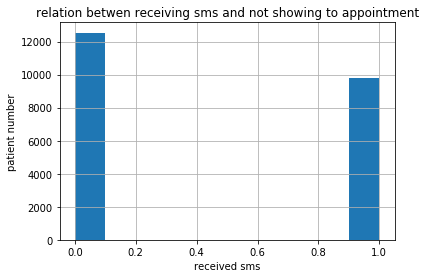

In [40]:
showing(df,'SMS_received',noshow,'relation betwen receiving sms and not showing to appointment','received sms','patient number' )

The number of patients who showed and didnt receive an SMS is more than that who received one.

### Does gender affect showing to the appoitnment?

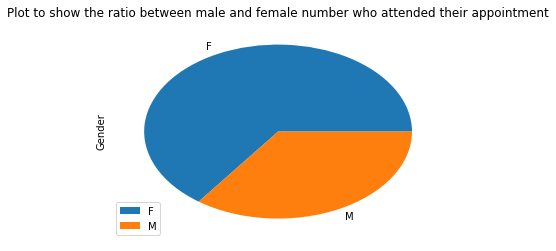

In [36]:
df['Gender'][show].value_counts().plot(kind='pie')
plt.legend();
plt.title('Plot to show the ratio between male and female number who attended their appointment');


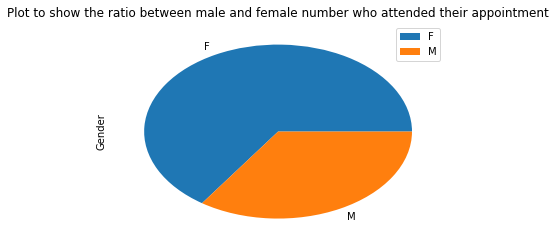

In [22]:
df['Gender'][noshow].value_counts().plot(kind='pie')
plt.legend();
plt.title('Plot to show the ratio between male and female number who attended their appointment');

from the last 2 pie charts, we can see that there isnt any relation between gender and the probability of showing in the appointment

### Does age affect showing to the appoitnment?

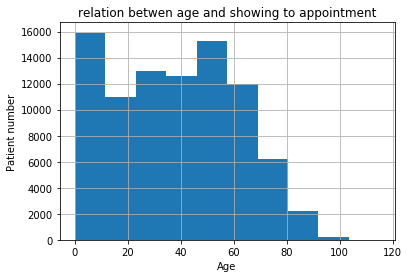

In [41]:
showing(df,'Age',show,'relation betwen age and showing to appointment','Age','Patient number' )

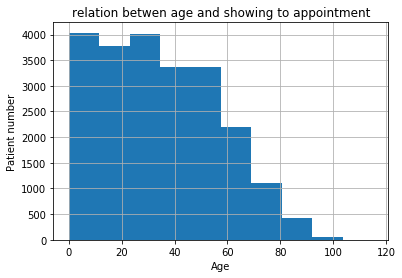

In [42]:
showing(df,'Age',noshow,'relation betwen age and showing to appointment','Age','Patient number' )

It is clear here that the children are more likely to show, as their parents would never miss the appointment

<a id='conclusions'></a>
## Conclusions

We found that number of showing patients which didnt recieve an sms is greater than those how recieved one, this means we need to work on the our sms awarness.

Age is a big factor on the showing probability, as parents will always care for their children, also grown ups (aged between 45-55) will show, but numbers decreases as the age increases.

gender doesnt have any corellation for showing to the appointment or no.

## Limitation

It does seem there is no major limitation in the data, as the only removed data was 1 row which had -1 years in the age column. and this wouldnt have a big impact on the results we obtained.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0